In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
df = pd.read_csv("C:/Users/DEEPANSH/Desktop/analytics project/Dataset 2/Dataset2.csv")
df.head()

,"On a scale of 1-5, how sincere have you been regarding academics during your stay INSIDE the campus [Pre-Lockdown Period]?","On a scale of 1-5, how emotionally satisfied are you with your current professional situation?"
0,2,3
1,2,3
2,3,4
3,3,3
4,4,3


In [285]:
df.columns

Index(['On a scale of 1-5, how sincere have you been regarding academics during your stay INSIDE the campus [Pre-Lockdown Period]?', 'On a scale of 1-5, how emotionally satisfied are you with your current professional situation?'], dtype='object')

In [286]:
df.rename(columns = {'On a scale of 1-5, how sincere have you been regarding academics during your stay INSIDE the campus [Pre-Lockdown Period]?' : 'Pre-Lockdown Seriousness'}, inplace = True)
df.rename(columns = {'On a scale of 1-5, how emotionally satisfied are you with your current professional situation?' : 'Current Satisfaction'}, inplace = True)
df.head()

,Pre-Lockdown Seriousness,Current Satisfaction
0,2,3
1,2,3
2,3,4
3,3,3
4,4,3


In [287]:
df['Pre-Lockdown Seriousness %'] = df['Pre-Lockdown Seriousness']/5*100
df['Current Satisfaction %'] = df['Current Satisfaction']/5*100
df.head()

,Pre-Lockdown Seriousness,Current Satisfaction,Pre-Lockdown Seriousness %,Current Satisfaction %
0,2,3,40.0,60.0
1,2,3,40.0,60.0
2,3,4,60.0,80.0
3,3,3,60.0,60.0
4,4,3,80.0,60.0


In [288]:
df.describe()

,Pre-Lockdown Seriousness,Current Satisfaction,Pre-Lockdown Seriousness %,Current Satisfaction %
count,439.000000,439.000000,439.000000,439.000000
mean,3.489749,2.574032,69.794989,51.480638
std,1.138476,1.148101,22.769520,22.962029
min,1.000000,1.000000,20.000000,20.000000
25%,3.000000,2.000000,60.000000,40.000000
50%,4.000000,2.000000,80.000000,40.000000
75%,4.000000,3.000000,80.000000,60.000000
max,5.000000,5.000000,100.000000,100.000000


In [289]:
mean_sincerity = df['Pre-Lockdown Seriousness'].mean()
print('mean sincerity is :', mean_sincerity)

mean sincerity is : 3.489749430523918


In [290]:
mean_satisfaction = df['Current Satisfaction'].mean()
print('mean satisfaction is :', mean_satisfaction)

mean satisfaction is : 2.574031890660592


In [291]:
median_sincerity = df['Pre-Lockdown Seriousness'].median()
print('median sincerity is :',median_sincerity)

median sincerity is : 4.0


In [292]:
median_satisfaction = df['Current Satisfaction'].median()
print('median satisfaction is :',median_satisfaction)

median satisfaction is : 2.0


In [293]:
variance_sincerity = df['Pre-Lockdown Seriousness'].var()
print('variance sincerity is :',variance_sincerity)

variance sincerity is : 1.296127562642365


In [294]:
variance_satisfaction = df['Current Satisfaction'].var()
print('variance satisfaction is :',variance_satisfaction)

variance satisfaction is : 1.3181369030902532


In [295]:
std_sincerity = df['Pre-Lockdown Seriousness'].std()
print('standard deviation sincerity is :',std_sincerity)

standard deviation sincerity is : 1.1384759824618018


In [296]:
std_satisfaction = df['Current Satisfaction'].std()
print('standard deviation satisfaction is :',std_satisfaction)

standard deviation satisfaction is : 1.1481014341469369


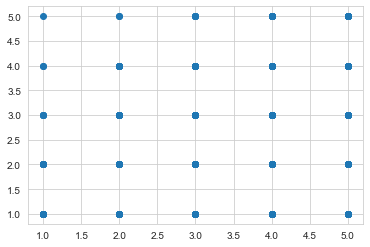

In [297]:
x = df['Pre-Lockdown Seriousness']
y = df['Current Satisfaction']

plt.scatter(x, y)
plt.show()

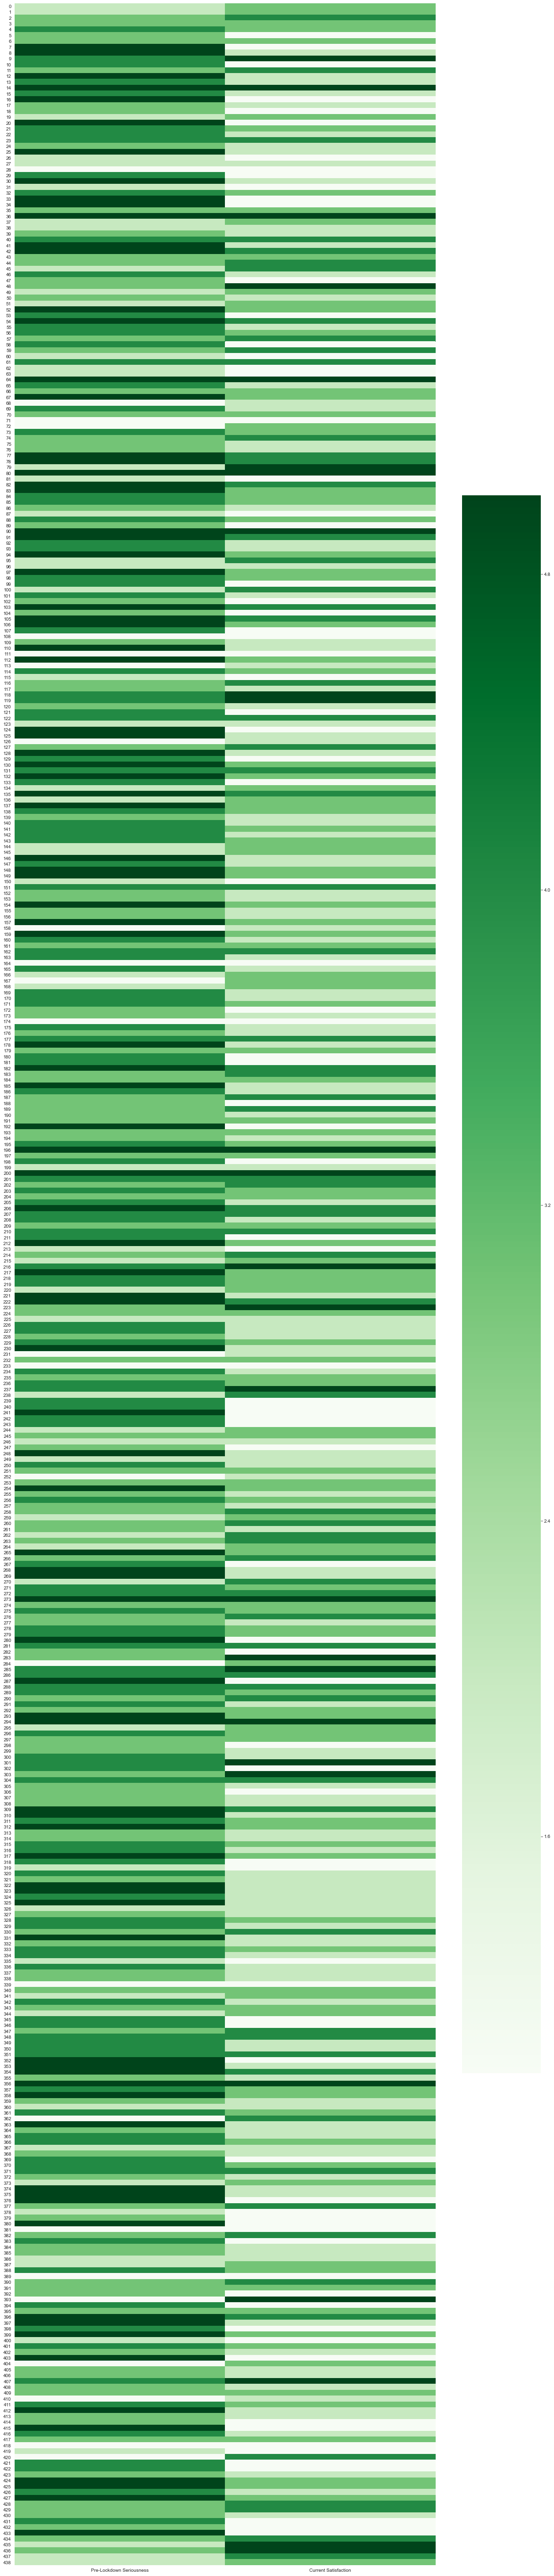

In [298]:
df1 = df.drop(['Pre-Lockdown Seriousness %', 'Current Satisfaction %'], axis=1)
f, ax = plt.subplots(figsize=(20, 100))
ax = sns.heatmap(df1,cmap="Greens")

   Pre-Lockdown Seriousness  Current Satisfaction
1                        25                    87
2                        59                   135
3                       126                   121
4                       134                    70
5                        95                    26


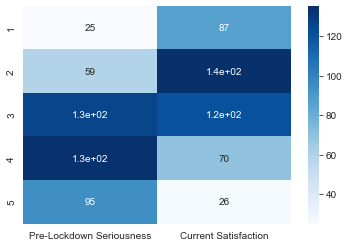

In [299]:
X = df1.apply(pd.Series.value_counts)
print(X)
ax = sns.heatmap(X,cmap="Blues",annot=True)

In [300]:
#counting values of duplicate rows 
df = (df.fillna('')\
      .groupby(df.columns.tolist()).apply(len)\
      .rename('group_count')\
      .reset_index()\
      .replace('',np.nan)\
      .sort_values(by = ['group_count'], ascending = False))

In [301]:
df_new = df.drop(['Pre-Lockdown Seriousness %', 'Current Satisfaction %'], axis=1)
df_new

,Pre-Lockdown Seriousness,Current Satisfaction,group_count
11,3,2,49
16,4,2,40
17,4,3,38
12,3,3,29
15,4,1,29
22,5,3,27
21,5,2,27
13,3,4,27
7,2,3,23
18,4,4,19


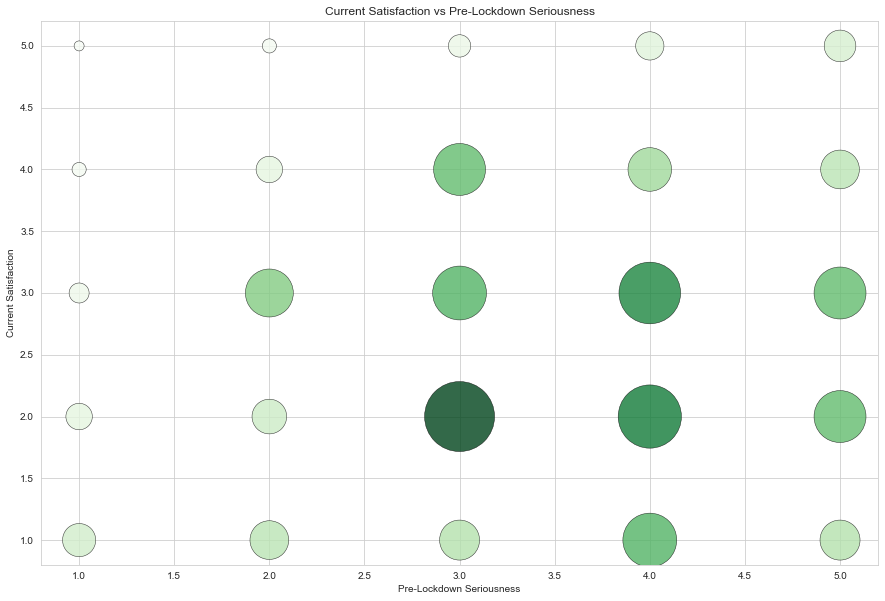

In [302]:
plt.figure(figsize=[15, 10])
x= df_new['Pre-Lockdown Seriousness']
y= df_new['Current Satisfaction']
z= df_new['group_count']
# use the scatter function
plt.scatter(x, y, s=z*100,alpha=0.8, cmap="Greens", c=z, edgecolors="black", linewidth=0.5)
plt.xlabel("Pre-Lockdown Seriousness")
plt.ylabel("Current Satisfaction")
plt.title("Current Satisfaction vs Pre-Lockdown Seriousness")


plt.show()

In [303]:
df_s=df_new.sort_values(['Current Satisfaction','Pre-Lockdown Seriousness'], ascending = False)
df_s

,Pre-Lockdown Seriousness,Current Satisfaction,group_count
24,5,5,10
19,4,5,8
14,3,5,5
9,2,5,2
4,1,5,1
23,5,4,15
18,4,4,19
13,3,4,27
8,2,4,7
3,1,4,2


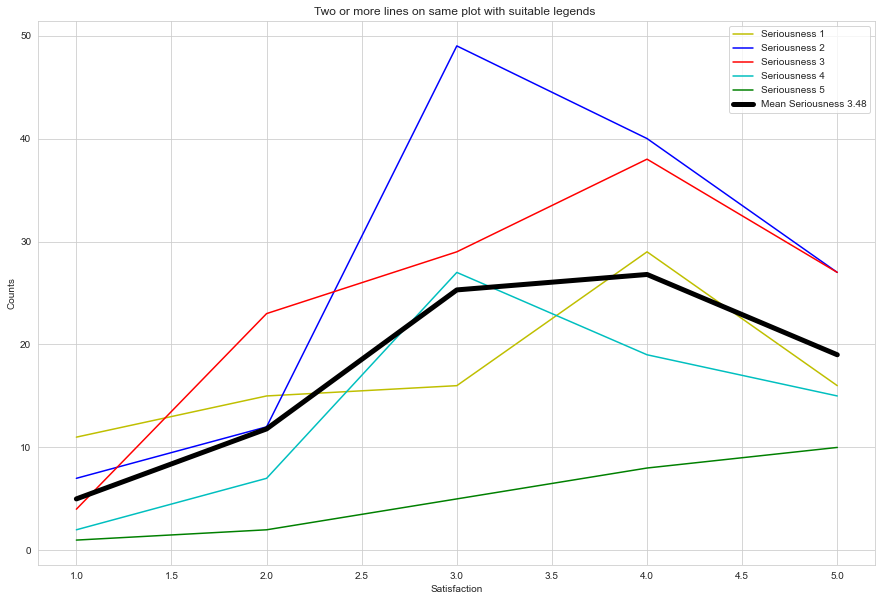

In [304]:
plt.figure(figsize=[15, 10])
x = [1,2,3,4,5]
y1 = [11,15,16,29,16]
y2 =[7,12,49,40,27]
y3 = [4,23,29,38,27]
y4 = [2,7,27,19,15]
y5 = [1,2,5,8,10]
#mean of values of 1,2,3,4,5 of y1,y2,y3,y4,y5
y6 = [5,11.8,25.3,26.8,19]

plt.plot(x, y1, label = "Seriousness 1", c = "y")
plt.plot(x, y2, label = "Seriousness 2", c = "b")
plt.plot(x, y3, label = "Seriousness 3", c = "r")
plt.plot(x, y4, label = "Seriousness 4", c = "c")
plt.plot(x, y5, label = "Seriousness 5", c = "g")
plt.plot(x, y6, label = "Mean Seriousness 3.48", c = "black", linewidth=5.0)
plt.xlabel('Satisfaction')
plt.ylabel('Counts')
plt.title('Seriousness Line graph of Satisfaction vs Counts')
plt.legend()

plt.show()

<AxesSubplot:title={'center':'group_count'}, xlabel='Pre-Lockdown Seriousness'>

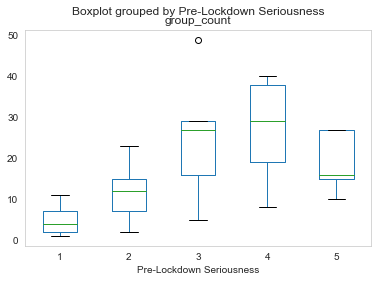

In [305]:
df.boxplot(by ='Pre-Lockdown Seriousness', column =['group_count'], grid = False) 

<AxesSubplot:title={'center':'group_count'}, xlabel='Current Satisfaction'>

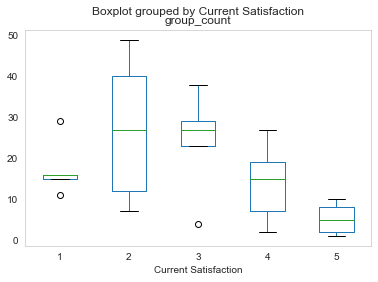

In [306]:
df.boxplot(by ='Current Satisfaction', column =['group_count'], grid = False) 